In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pingouin as pg
import matplotlib.dates as dates
import datetime

In [6]:
corona = pd.read_csv('covid.csv')
pd.set_option('display.max_columns', None)
corona['rows'] = np.arange(len(corona))

In [7]:
corona.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,rows
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,1
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,2
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,3
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,4


In [8]:
corona['date'].head()

0    2019-12-31
1    2020-01-01
2    2020-01-02
3    2020-01-03
4    2020-01-04
Name: date, dtype: object

In [9]:
for i in corona.columns:
    print(i)
    print(corona[i].value_counts())

iso_code
BHR    236
EST    236
HRV    236
ROU    236
VNM    236
CHE    236
SMR    236
NPL    236
USA    236
MKD    236
GEO    236
CAN    236
IND    236
KWT    236
KOR    236
MYS    236
FIN    236
NLD    236
AZE    236
IRQ    236
BEL    236
KHM    236
AUS    236
AUT    236
IRL    236
LKA    236
ITA    236
SGP    236
PAK    236
BRA    236
      ... 
DMA    153
GRD    153
SYR    153
MOZ    153
BLZ    152
VIR    152
LBY    151
LAO    151
TCA    151
MLI    150
KNA    150
VGB    149
GNB    149
AIA    149
PRI    148
MNP    145
SLE    144
BDI    144
BWA    144
BES    143
MWI    142
FLK    141
SSD    139
STP    136
YEM    135
ESH    119
TJK    114
COM    113
LSO    100
HKG     18
Name: iso_code, Length: 211, dtype: int64
continent
Europe           10386
Asia              9467
Africa            8822
North America     5957
South America     2298
Oceania           1447
Name: continent, dtype: int64
location
Cambodia                           236
Qatar                              236
Iran         

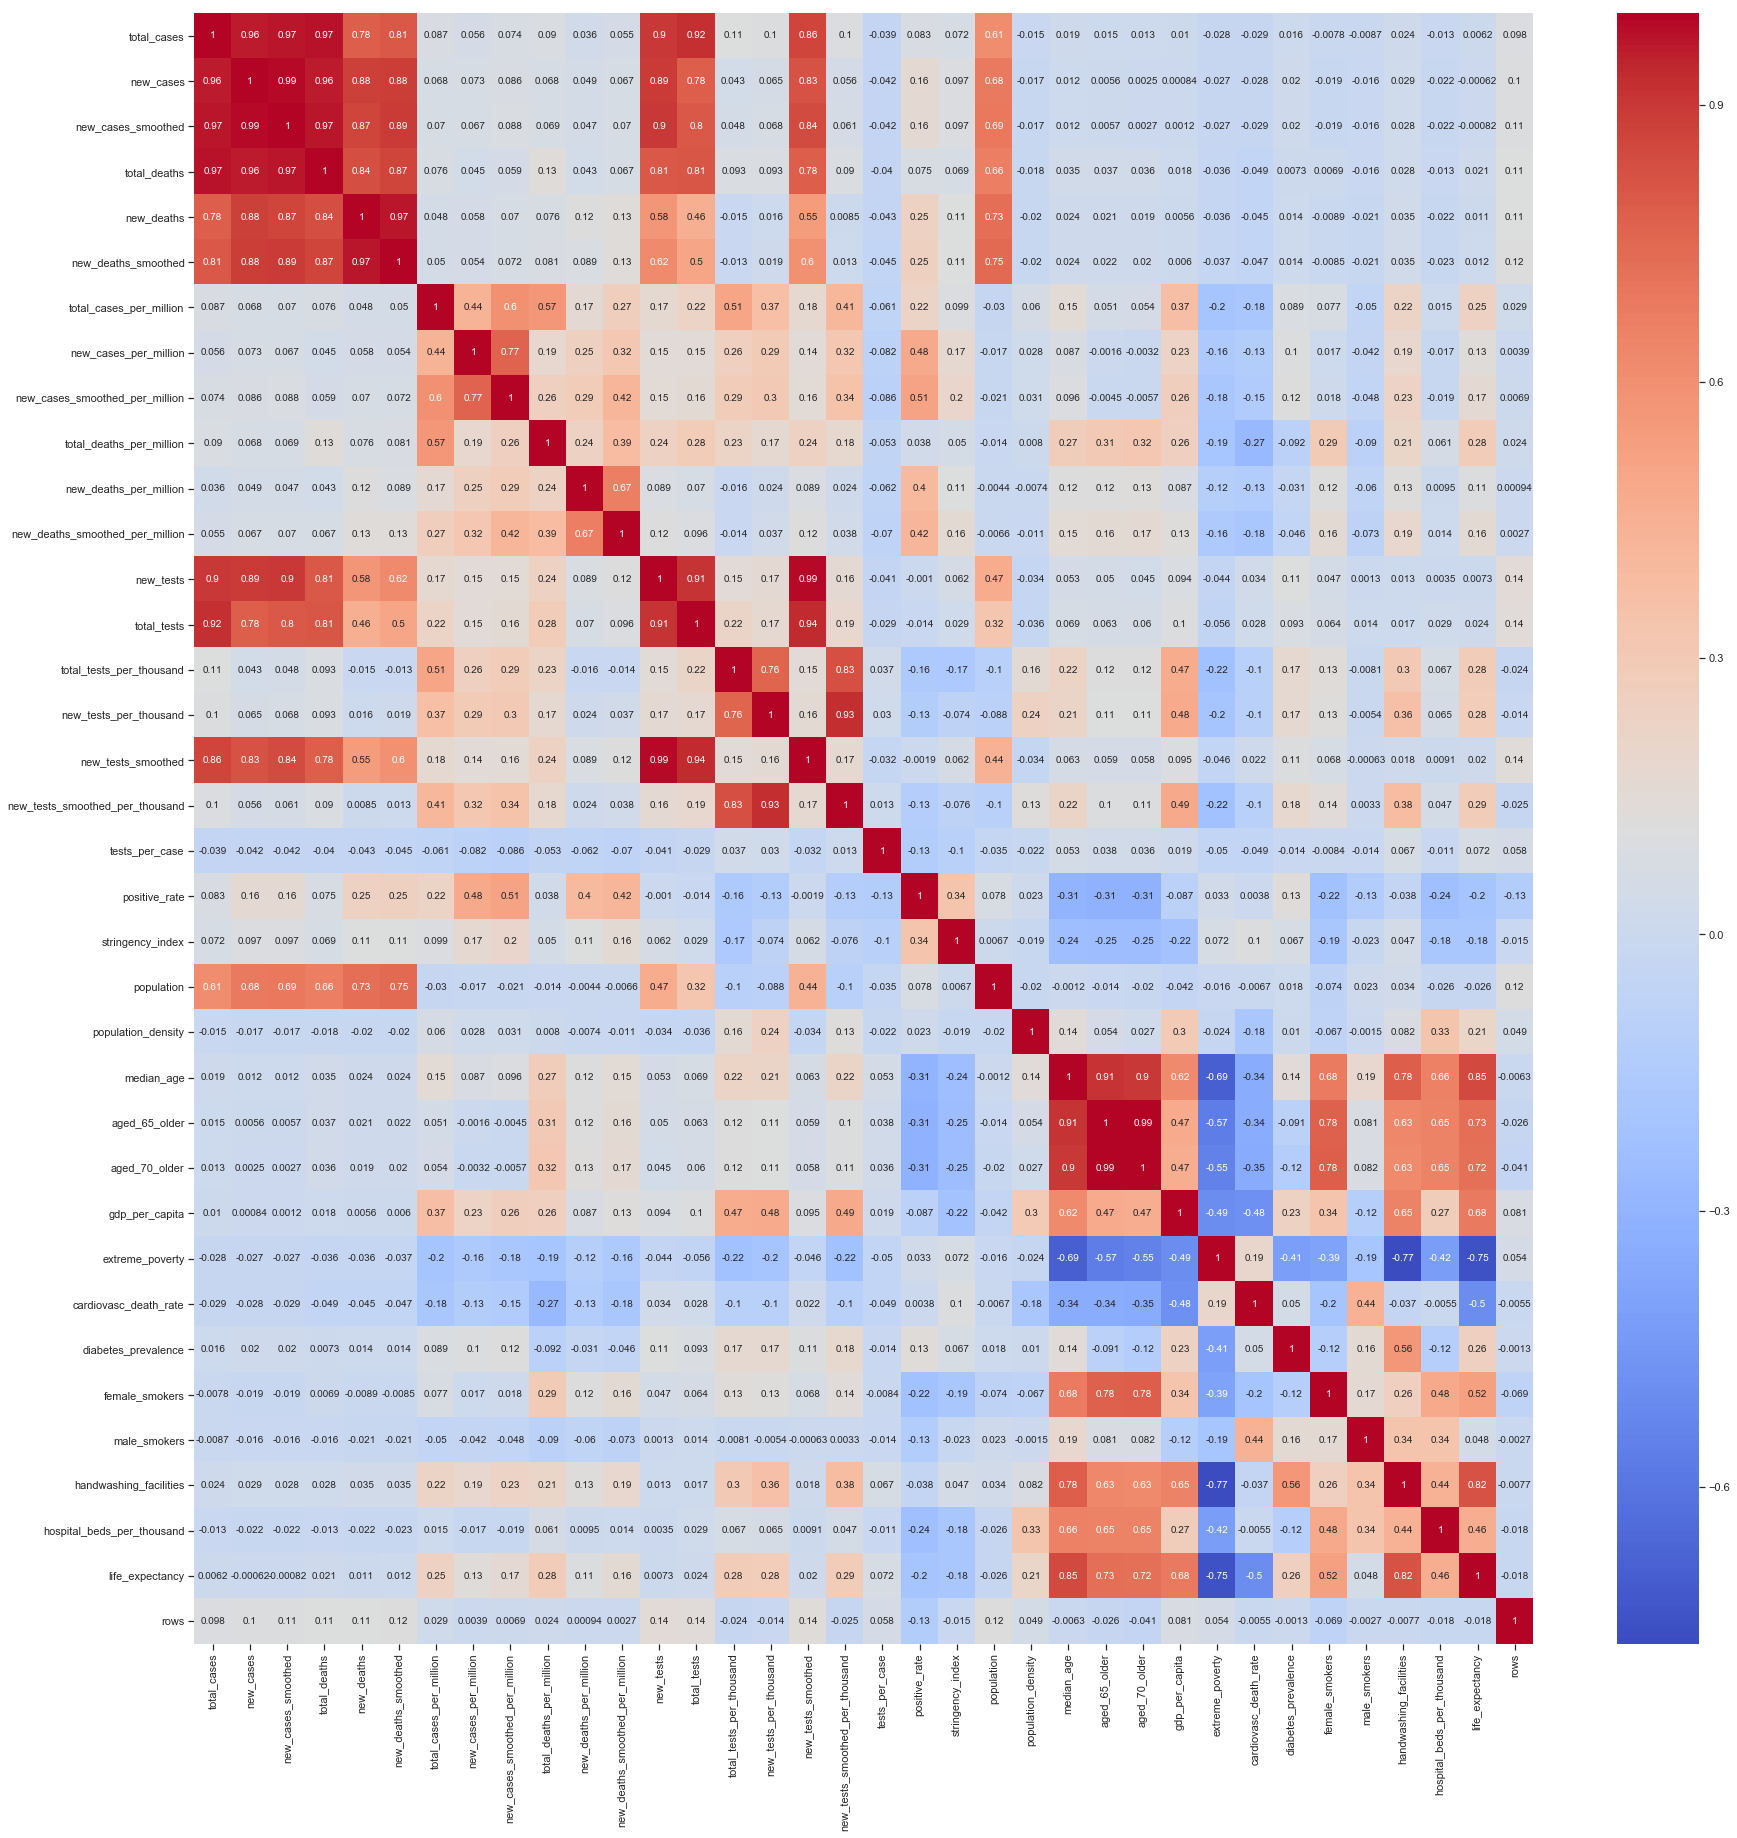

In [10]:
plt.figure(figsize=(30,30))
sns.heatmap(corona.corr(), annot=True, cmap='coolwarm')

In [11]:
corona.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
new_cases_smoothed                 float64
total_deaths                       float64
new_deaths                         float64
new_deaths_smoothed                float64
total_cases_per_million            float64
new_cases_per_million              float64
new_cases_smoothed_per_million     float64
total_deaths_per_million           float64
new_deaths_per_million             float64
new_deaths_smoothed_per_million    float64
new_tests                          float64
total_tests                        float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_per_case                     float64
positive_ra

In [12]:
num = [i for i in corona.columns if corona[i].dtype != 'O']
cat = [i for i in corona.columns if corona[i].dtype == 'O']

In [13]:
num

['total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'new_tests',
 'total_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'tests_per_case',
 'positive_rate',
 'stringency_index',
 'population',
 'population_density',
 'median_age',
 'aged_65_older',
 'aged_70_older',
 'gdp_per_capita',
 'extreme_poverty',
 'cardiovasc_death_rate',
 'diabetes_prevalence',
 'female_smokers',
 'male_smokers',
 'handwashing_facilities',
 'hospital_beds_per_thousand',
 'life_expectancy',
 'rows']

In [14]:
cat

['iso_code', 'continent', 'location', 'date', 'tests_units']

In [15]:
corona_num = corona[num].copy()
corona_cat = corona[cat].copy()
corona_num.head()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,rows
0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0
1,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,1
2,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,2
3,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,3
4,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,4


In [16]:
corona_cat

,iso_code,continent,location,date,tests_units
0,AFG,Asia,Afghanistan,2019-12-31,NaN
1,AFG,Asia,Afghanistan,2020-01-01,NaN
2,AFG,Asia,Afghanistan,2020-01-02,NaN
3,AFG,Asia,Afghanistan,2020-01-03,NaN
4,AFG,Asia,Afghanistan,2020-01-04,NaN
5,AFG,Asia,Afghanistan,2020-01-05,NaN
6,AFG,Asia,Afghanistan,2020-01-06,NaN
7,AFG,Asia,Afghanistan,2020-01-07,NaN
8,AFG,Asia,Afghanistan,2020-01-08,NaN
9,AFG,Asia,Afghanistan,2020-01-09,NaN


In [17]:
corona_cat = corona_cat.fillna('NA')

In [18]:
corona_cat

,iso_code,continent,location,date,tests_units
0,AFG,Asia,Afghanistan,2019-12-31,NA
1,AFG,Asia,Afghanistan,2020-01-01,NA
2,AFG,Asia,Afghanistan,2020-01-02,NA
3,AFG,Asia,Afghanistan,2020-01-03,NA
4,AFG,Asia,Afghanistan,2020-01-04,NA
5,AFG,Asia,Afghanistan,2020-01-05,NA
6,AFG,Asia,Afghanistan,2020-01-06,NA
7,AFG,Asia,Afghanistan,2020-01-07,NA
8,AFG,Asia,Afghanistan,2020-01-08,NA
9,AFG,Asia,Afghanistan,2020-01-09,NA


In [19]:
for i in corona.columns:
    if corona[i].dtype=='O':
        corona[i] = corona[i].fillna('NA')

In [20]:
corona

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,rows
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,1
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,2
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,3
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,4
5,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,5
6,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,6
7,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,7
8,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,8
9,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,9


In [21]:
corona = corona.fillna(0)

In [22]:
continents = corona.continent.unique()
group = corona.groupby('continent')
continents_group = []
for i in continents:
    continents_group.append(group.get_group(i))


----------------------------------------------

In [23]:
country_group = []
for i in continents_group:
    country_group.append(i.groupby('location'))

In [24]:
country = country_group[0]

In [25]:
country = []

In [26]:
for i in range(0,len(continents)):
    if(continents[i]=='NA'):
        print(i,' for:','Others')
    else:
        print(i,' for:',continents[i])

0  for: Asia
1  for: Europe
2  for: Africa
3  for: North America
4  for: South America
5  for: Oceania
6  for: Others


In [25]:
#-----------------------------------------------

In [27]:
corona

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,rows
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NA,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NA,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,1
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NA,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,2
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NA,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,3
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NA,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,4
5,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NA,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,5
6,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NA,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,6
7,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NA,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,7
8,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NA,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,8
9,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NA,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,9


### Polynomial

0  for: Asia
1  for: Europe
2  for: Africa
3  for: North America
4  for: South America
5  for: Oceania
6  for: Others
Your option:0

['Saudi Arabia', 'Bangladesh', 'Pakistan', 'Iran', 'India']
Enter no. of days after you want to predict for Saudi Arabia
3
[[292619.12529284]]
Enter no. of days after you want to predict for Bangladesh
3
[[281246.88679761]]
Enter no. of days after you want to predict for Pakistan
3
[[286357.72048321]]
Enter no. of days after you want to predict for Iran
3
[[363341.98888794]]
Enter no. of days after you want to predict for India
3
[[3235869.09047126]]


<Figure size 576x576 with 0 Axes>

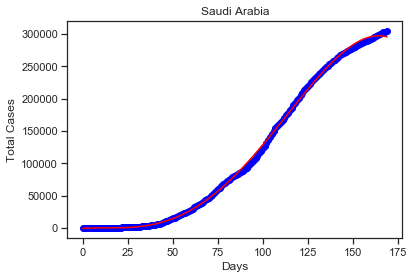

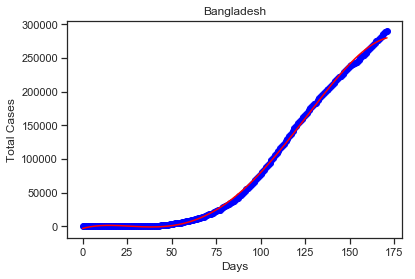

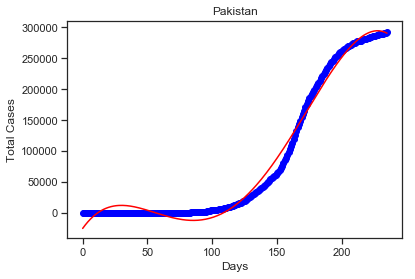

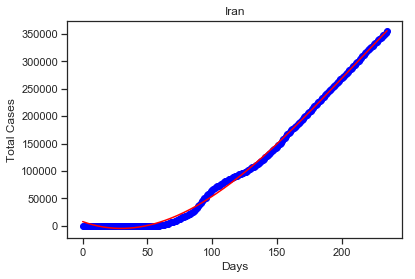

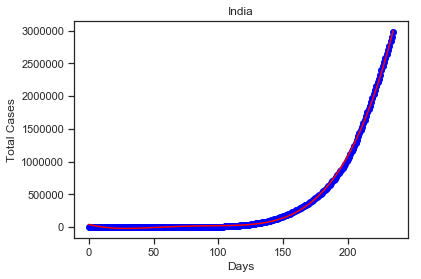

In [28]:
for i in range(0,len(continents)):
    if(continents[i]=='NA'):
        print(i,' for:','Others')
    else:
        print(i,' for:',continents[i])
n = int(input('Your option:'))
country = continents_group[n].location.unique()
print()
cases = {}
for i in country:
        country = continents_group[n].location.unique()
        #print(i)
        cases[i] = country_group[n].get_group(i)['total_cases'].max()
        #print(country_group[n].get_group(i)['total_cases'].max())
top5 = []
for i in range(0,5):
    maximum = max(cases, key=cases.get) 
    top5.append(maximum)
    cases[maximum] = 0

cases = {}
top5 = list(set(top5))
print(top5)
plt.figure(figsize=(8,8))
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
for i in top5:
    model = LinearRegression()
    X = country_group[n].get_group(i).iloc[:,40].values
    y = country_group[n].get_group(i).iloc[:,4:5].values
    minimum = country_group[n].get_group(i)['rows'].min()
    #print(minimum,X)
    for k in range(0,len(X)):
        X[k] = X[k]-minimum
    #print(X)
    X = X.reshape(-1,1)
    y = y.reshape(-1,1)
    model.fit(X, y) 

    poly = PolynomialFeatures(degree = 4) 
    X_poly = poly.fit_transform(X) |


    poly.fit(X_poly, y) 
    lin2 = LinearRegression() 
    lin2.fit(X_poly, y) 

    plt.subplots()
    #Polynomial Regression
    plt.scatter(X, y, color = 'blue') 

    plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 
    plt.title(i) 
    plt.xlabel('Days') 
    plt.ylabel('Total Cases') 

    print('Enter no. of days after you want to predict for', i)
    pred = int(input())
    print(lin2.predict(poly.fit_transform([[pred+X.max()]])))

0  for: Asia
1  for: Europe
2  for: Africa
3  for: North America
4  for: South America
5  for: Oceania
6  for: Others
Your option:0

['Saudi Arabia', 'Bangladesh', 'Pakistan', 'Iran', 'India']
enter the no of days for which you want the prediction for Saudi Arabia
3


<Figure size 576x576 with 0 Axes>

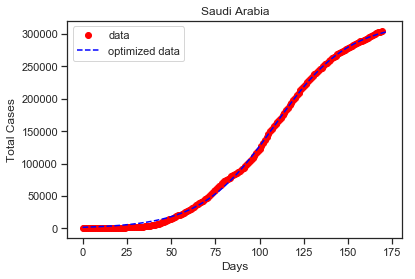

pred for country Saudi Arabia is [302343, 303050, 303727]
enter the no of days for which you want the prediction for Bangladesh
3


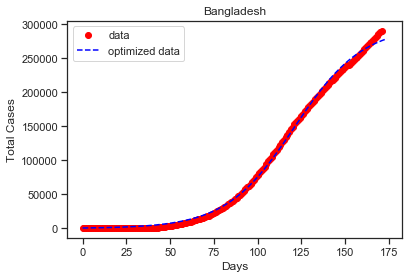

pred for country Bangladesh is [276832, 277782, 278691]
enter the no of days for which you want the prediction for Pakistan
3


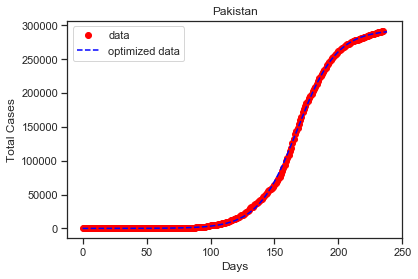

pred for country Pakistan is [290225, 290438, 290638]
enter the no of days for which you want the prediction for Iran
3


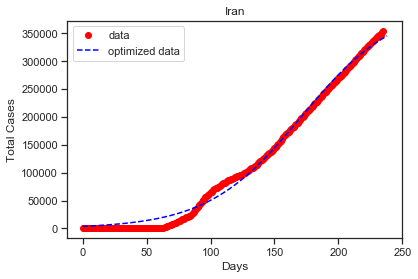

pred for country Iran is [342833, 344180, 345500]
enter the no of days for which you want the prediction for India
3


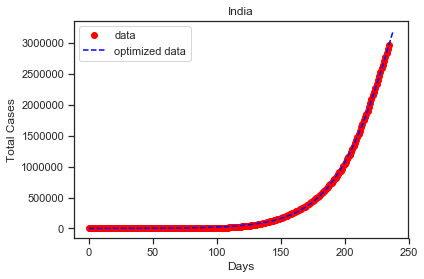

pred for country India is [3058513, 3128728, 3199244]


In [29]:
#Curve Fitting
def sigmoid(x, a, b, c): 
    return a/(b+np.exp(-c*x))
for i in range(0,len(continents)):
    if(continents[i]=='NA'):
        print(i,' for:','Others')
    else:
        print(i,' for:',continents[i])
n = int(input('Your option:'))
country = continents_group[n].location.unique()
print()
cases = {}
for i in country:
        country = continents_group[n].location.unique()
        #print(i)
        cases[i] = country_group[n].get_group(i)['total_cases'].max()
        #print(country_group[n].get_group(i)['total_cases'].max())
top5 = []
for i in range(0,5):
    maximum = max(cases, key=cases.get) 
    top5.append(maximum)
    cases[maximum] = 0

cases = {}
top5 = list(set(top5))
print(top5)
plt.figure(figsize=(8,8))
from scipy.optimize import curve_fit 
for i in top5:
    print("enter the no of days for which you want the prediction for",i)
    days = int(input())
    X = country_group[n].get_group(i).iloc[:,40].values
    y = country_group[n].get_group(i).iloc[:,4:5].values
    Y = []
    for j in y:
        for k in j:
            Y.append(k) 
    minimum = X.min()
    for k in range(0,len(X)):
        X[k] = X[k]-minimum
    #print(X)
    param, param_cov = curve_fit(sigmoid, X, Y)
    #print(param_cov,param)
    Y_fit=sigmoid(range(len(X)+days),param[0],param[1],param[2])
    plt.subplots()
    plt.plot(X, Y, 'o', color ='red', label ="data") 
    plt.plot(range(len(X)+days), Y_fit, '--', color ='blue', label ="optimized data") 
    plt.legend() 
    plt.title(i) 
    plt.xlabel('Days') 
    plt.ylabel('Total Cases')
    plt.show() 
    pred = sigmoid(range(len(X)+days),param[0],param[1],param[2])
    print('pred for country',i,'is',list(map(int,pred[-days:])))

In [88]:
corona['date'].max()

'2020-08-22'

In [30]:
# for i in range(100):
#             plot_data=corona.iloc[i,:].apply(lambda x : np.nan if x==0 else x)
# #          plot_data=corona.dropna()
#             fig=plt.figure(figsize=(18,6))
#             plt.plot(range(len(corona.values)),corona.values,'-o')
#             plt.title('Covid 19 plot for'+(country_group[0].get_group().get_group(n)))
#             plt.show()
#             time.sleep(2)
            
